A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [ ]:
#Import important libraries

import pandas as pd #For Data Manipulation
import numpy as np #For mathematical operations
import seaborn as sns #Visulaization library
import matplotlib.pyplot as plt #Basic Visualization library
import os #Library to make use of underlying OS

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df2=pd.read_excel(r'C:/Users/z0126520/Documents/Python/GL/Week8/Project_2_bank/godigt_cc_data.xlsx')

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.isnull().sum()

> As transactor revolver do not affect the attrition no need to fill the boolean data

#From the given columns we are eleminating 
<br>1.userid - each user have unique IDs, no affect to Attrition
<br>2.card No - Card no does not affect the Attrition, as it is not connected to money
<br>3.card source date - Customers will not disable CC with source data, as what ever the date it is fine to use the card
<br>4.active 30_60_90 - Coustomers activity in salary/current/savings account do not relate to CC
<br>5.hotlist flag - Customers who are in hotlist flag group are less that 1% of total customer and loosing a card, does not means disable the card. As the bank gives new card immediately
<br>6.Widget_products, Engagement_products - Here no particular information about CC in the count of widget products.
<br>7.T+1 & T+2 Month Activity not required as we are using avg spend of last 3 months
<br>8. Transactor_revolver - Transactor will pay each and every month so no Attrition problems, revolver is there he cannot disable the card - so Attrition not affected




In [ ]:
df2.info()

In [ ]:
cat=[]
num=[]
for i in df2.columns:
    if df2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

In [ ]:
df2[cat]

In [ ]:
df2['Issuer']=df2['Issuer'].astype('category')
df2['card_type']=df2['card_type'].astype('category')
df2['high_networth']=df2['high_networth'].astype('category')
df2['other_bank_cc_holding']=df2['other_bank_cc_holding'].astype('category')
df2['Occupation_at_source']=df2['Occupation_at_source'].astype('category')

In [ ]:
df2[cat].info()

In [ ]:
df2['Issuer_cat']=df2['Issuer'].cat.codes
df2['Issuer_cat'].unique()

In [ ]:
df2['Issuer'].unique()

In [ ]:
df2['card_type_cat']=df2['card_type'].cat.codes
df2['card_type_cat'].unique()

In [ ]:
df2['card_type'].unique()

In [ ]:
df2['high_networth_cat']=df2['high_networth'].cat.codes
df2['high_networth_cat'].unique()

In [ ]:
df2['high_networth'].unique()

In [ ]:
df2['other_bank_cc_holding_cat']=df2['other_bank_cc_holding'].cat.codes
df2['other_bank_cc_holding_cat'].unique()

In [ ]:
df2['other_bank_cc_holding'].unique()

In [ ]:
df2['Occupation_at_source_cat']=df2['Occupation_at_source'].cat.codes
df2['Occupation_at_source_cat'].unique()

In [ ]:
df2['Occupation_at_source'].unique()

In [ ]:
df2.head(0)

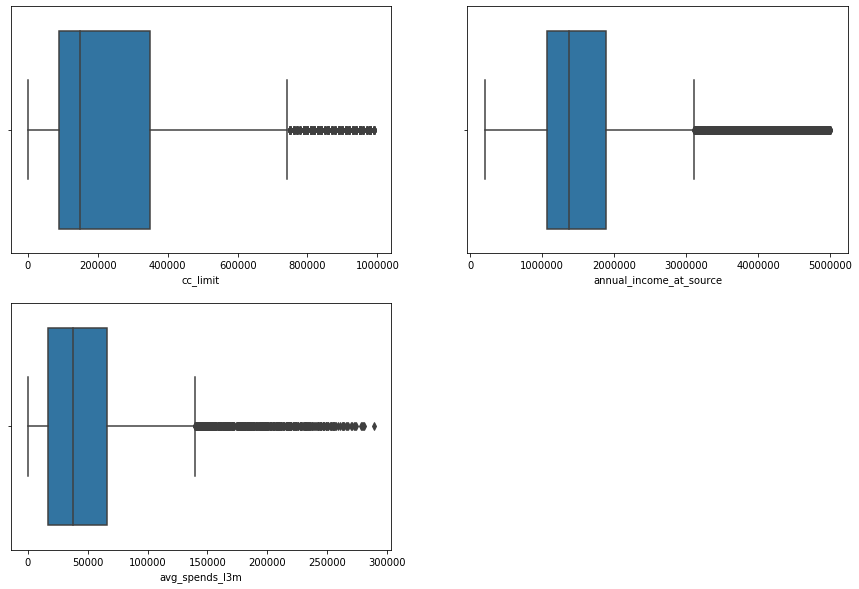

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(df2.cc_limit);
plt.subplot(222)
sns.boxplot(df2.annual_income_at_source);
plt.subplot(223)
sns.boxplot(df2.avg_spends_l3m);

In [50]:
df2['cc_limit'].dtype

dtype('int64')

In [54]:
df2.head(0)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat


In [63]:
df3=df2.copy()

In [65]:
df2.head(0)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat


In [71]:
df3.drop(['userid','card_no','card_bin_no','Issuer','card_type','card_source_date','high_networth'],axis=1,inplace=True)
df3.head()

,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,...,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat
0,0,1,1,0,0,0,N,1,3,1552111,...,0,T,27729,Self Employed,290000,2,4,1,1,4
1,1,1,1,0,0,0,N,4,1,4833871,...,0,R,280854,0,950000,2,10,0,1,0
2,0,0,0,0,0,0,N,4,2,1345429,...,0,R,70587,Student,210000,2,12,2,0,5
3,0,1,1,1,1,1,N,6,0,880560,...,0,T,9156,Self Employed,80000,2,7,4,0,4
4,1,1,1,0,1,1,N,4,3,1808582,...,0,T,38108,Salaried,220000,2,4,1,0,3


In [72]:
df3.drop(['active_30','active_60','active_90','hotlist_flag','widget_products','engagement_products','T+1_month_activity','T+2_month_activity'],axis=1,inplace=True)
df3.head(0)

,cc_active30,cc_active60,cc_active90,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat


In [73]:
df3.drop(['Transactor_revolver','Occupation_at_source','cc_limit'],axis=1,inplace=True)
df3.head(0)

,cc_active30,cc_active60,cc_active90,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat


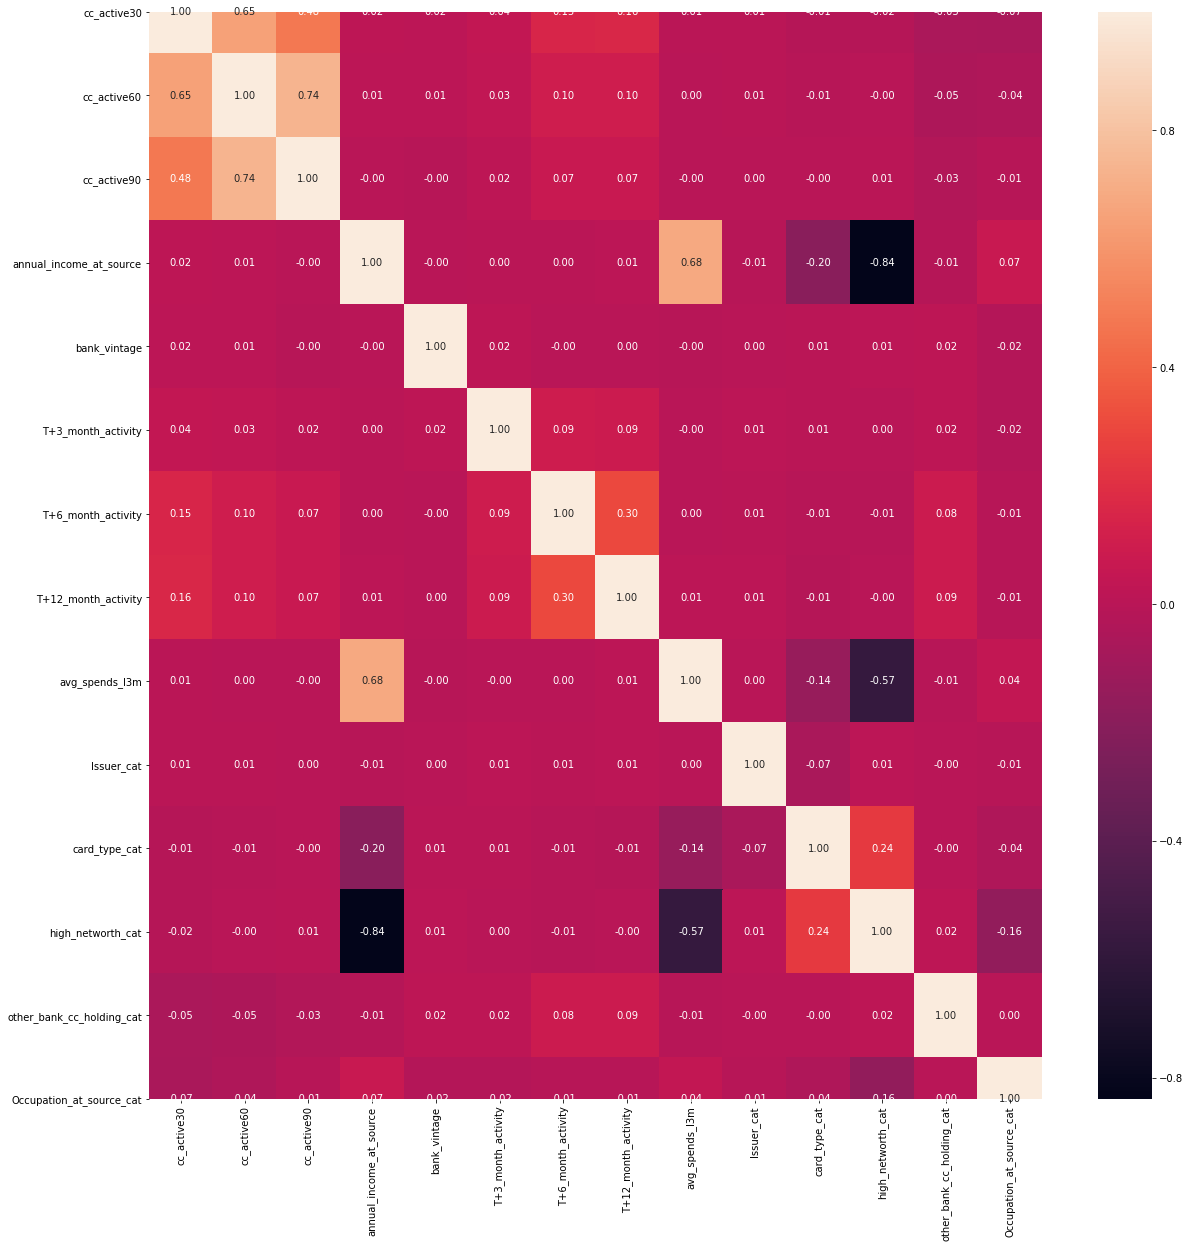

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True,fmt=".2f");#how the df.corr() function working here

In [77]:
df3.corr().round(2)

,cc_active30,cc_active60,cc_active90,annual_income_at_source,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat,Occupation_at_source_cat
cc_active30,1.00,0.65,0.48,0.02,0.02,0.04,0.15,0.16,0.01,0.01,-0.01,-0.02,-0.05,-0.07
cc_active60,0.65,1.00,0.74,0.01,0.01,0.03,0.10,0.10,0.00,0.01,-0.01,-0.00,-0.05,-0.04
cc_active90,0.48,0.74,1.00,-0.00,-0.00,0.02,0.07,0.07,-0.00,0.00,-0.00,0.01,-0.03,-0.01
annual_income_at_source,0.02,0.01,-0.00,1.00,-0.00,0.00,0.00,0.01,0.68,-0.01,-0.20,-0.84,-0.01,0.07
bank_vintage,0.02,0.01,-0.00,-0.00,1.00,0.02,-0.00,0.00,-0.00,0.00,0.01,0.01,0.02,-0.02
T+3_month_activity,0.04,0.03,0.02,0.00,0.02,1.00,0.09,0.09,-0.00,0.01,0.01,0.00,0.02,-0.02
T+6_month_activity,0.15,0.10,0.07,0.00,-0.00,0.09,1.00,0.30,0.00,0.01,-0.01,-0.01,0.08,-0.01
T+12_month_activity,0.16,0.10,0.07,0.01,0.00,0.09,0.30,1.00,0.01,0.01,-0.01,-0.00,0.09,-0.01
avg_spends_l3m,0.01,0.00,-0.00,0.68,-0.00,-0.00,0.00,0.01,1.00,0.00,-0.14,-0.57,-0.01,0.04
Issuer_cat,0.01,0.01,0.00,-0.01,0.00,0.01,0.01,0.01,0.00,1.00,-0.07,0.01,-0.00,-0.01
